# Monte Carlo Simulation

### Libraries

In [35]:
# Core Libraries 
import pandas as pd

import numpy as np

# Graphical
import matplotlib.pyplot as plt

# Data Set
import yfinance as yf

# Statistical 
from scipy.stats import norm

**Intorduction**

A Monte Carlo simulation represents the likelihood of various outcomes in a process that is challenging to predict due to the involvement of random variables. Its primary purpose is to gain insights into the effects of risk and uncertainty.

To understand the principle behind monte carlo simulation, lets take an example of flipping a coin. when you flip a coin, the probability of getting ‘Head’ is 0.5. When we flip the coin for 50 times, it is hard to tell how many heads we will get. lets try using monte carlo simulation in this example.

In [38]:
def coin_flip():
    return np.random.randint(0,2)

print("Result:",coin_flip())

Result: 1


In [40]:
# Monte Carlo Simulation

List = []

def MonteCarlo(n):
    results = 0

    for i in range(n):
        flip_result = coin_flip()
        results = results + flip_result

        # Calulating Probabilities values
        prob_values = results/(i +1)

        #Added our results to List
        List.append(prob_values)

        # Graphical Result

        plt.axhline(y=0.5, color ="red", linestyle="-")
        plt.xlabel("Iteration")
        plt.ylabel("Probability")
        plt.plot(List)

    return results/n

Result: 0.496


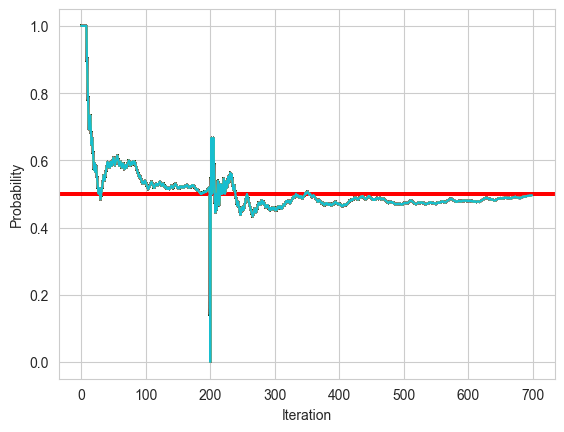

In [43]:
# Calling Functions

result = MonteCarlo(500)

print("Result:",result)

This is how we can use the Monte Carlo Simulation to find probabilities experimentally.

## Applying Monte Carlo Simulation

In [49]:
data = yf.download("AAPL")
data = data[data.index >= "2008-01-01"]
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,7.116786,7.152143,6.876786,6.958571,5.891122,1079178800
2008-01-03,6.978929,7.049643,6.881786,6.961786,5.893845,842066400
2008-01-04,6.837500,6.892857,6.388929,6.430357,5.443936,1455832000
2008-01-07,6.473214,6.557143,6.079643,6.344286,5.371069,2072193200
2008-01-08,6.433571,6.516429,6.100000,6.116071,5.177864,1523816000


This data contains the high, low, open, close value of stock , volume and the adj close price. We will use only the closing price of the stock. So lets create new dataframe called new_data to forecast Apple Inc. future stock price in this exercise.

In [50]:
new_data = data["Close"]
new_data.head()

Date
2008-01-02    6.958571
2008-01-03    6.961786
2008-01-04    6.430357
2008-01-07    6.344286
2008-01-08    6.116071
Name: Close, dtype: float64

<Axes: xlabel='Date'>

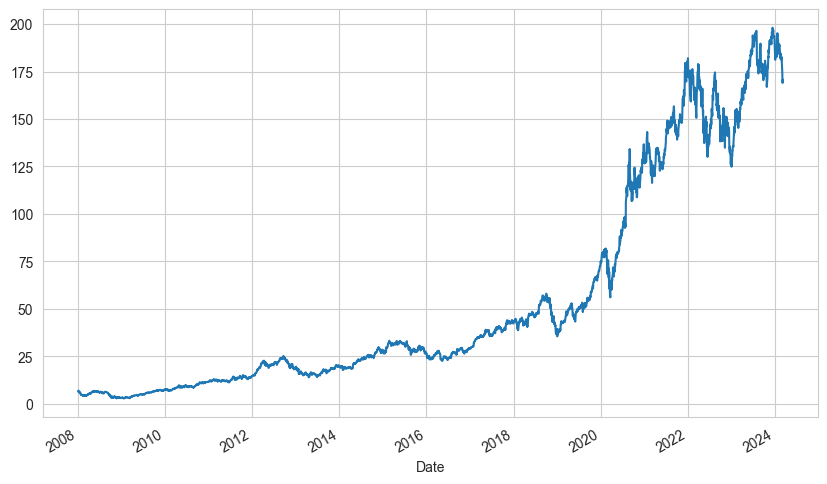

In [51]:
new_data.plot(figsize = (10,6))

There are two components to running a Monte Carlo simulation:

1) the equation to evaluate

2) the random variables for the input

Lets look in to the formula first to derive the equation to evaluate.

**Today’s Stock Price = Yesterday’s Stock Price x e^r**

where **r = periodic daily return**

Monte carlo simulation generates theoretical future ‘r’ values because the rate of return on an asset is a random number. To model the movement and determine possible future ‘r’ values we must use a formula that models random movements. Here we will use a formula of Brownian motion.

Brownian motion assumes that there are two parts to the random movement. The first is the overall driving force called as ‘drift’ and the second is the random component. Therefore the rate that the asset changes in value each day- the ‘r’ value that the e is raised to can be broken down into two parts-an overall drift and a random stochastic component.

Amount change in stock Price = Fixed drift rate + Random stochastic variable

To create a monte carlo simulator to model future outcomes we need to find theses two parts- the drift and the random stochastic component.

The first thing we’ll do is estimate its historical log returns.

In [52]:
log_returns = np.log(1 + new_data.pct_change())

log_returns.tail()

Date
2024-03-04   -0.025709
2024-03-05   -0.028853
2024-03-06   -0.005896
2024-03-07   -0.000710
2024-03-08    0.010185
Name: Close, dtype: float64

<Axes: xlabel='Date'>

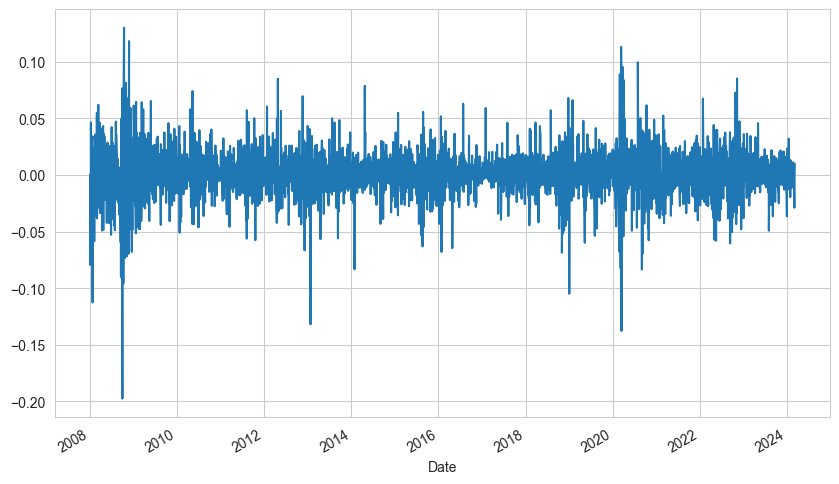

In [53]:
log_returns.plot(figsize = (10,6))

The first part — Drift is expected periodic daily rate of return. The formula we will use here will be-

**Drift = Average Daily Return− (Variance​/2)**

Calculating Drift:



In [54]:
adr = log_returns.mean()
adr

0.0007856884864319546

In [55]:
var = log_returns.var()
var

0.00038934062218091254

In [57]:
drift = adr - (0.5*var)
drift

0.0005910181753414983

To calculate the second part- create a variable stdev which is a standard deviation of historic log returns

In [58]:
stdev = log_returns.std()
stdev

0.01973171614890384

The central limit theorem tells us that if we plot enough periodic daily returns of an asset the graph should form a normal distribution, bell shaped graph.

To create get the random stochastic component we will use the norm.ppf formula as follows:

In [59]:
norm.ppf(0.95)

1.6448536269514722

If an event has a 95% chance of occurring, the distance between this event and the mean will be approximately 1.64 standard deviations. we will use the numpy rand function to randomize this component. we want a multidimensional array so we will insert to arguments.

In [60]:
x = np.random.rand(10,2)
x

array([[0.31826492, 0.05061157],
       [0.09556166, 0.13207231],
       [0.72194033, 0.63402883],
       [0.32544417, 0.92847881],
       [0.30678683, 0.61557786],
       [0.9256546 , 0.69316368],
       [0.9963462 , 0.65224533],
       [0.58036774, 0.60562891],
       [0.96862973, 0.89042341],
       [0.34093979, 0.87097493]])

We will include this random element within the “PPF” distribution to obtain the distance from the mean corresponding to each of these randomly generated probabilities.

In [61]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-0.43683228,  0.04146562],
       [ 0.57818944,  0.0828745 ],
       [ 1.79142295, -1.77343028],
       [ 0.78849663, -0.69843932],
       [ 0.63109711,  0.63141118],
       [ 0.67317031,  0.66133893],
       [-0.1999303 ,  0.82174618],
       [-0.42069794, -0.31155124],
       [ 0.28531313,  0.4998234 ],
       [-1.18024815, -1.14295419]])

Now we have understood how to create a random component. lets put it in to formula. If we want stock price predictions of next 1000 days with 20 iterations, we will define variables as follows:

In [62]:
t_intervals = 1000
iterations  = 20

daily_retuns = np.exp(np.array(drift) + np.array(stdev)*
                      norm.ppf(np.random.rand(t_intervals,iterations)))

daily_retuns

array([[0.9849156 , 0.98411176, 1.00485922, ..., 0.97846001, 1.0337376 ,
        0.99935155],
       [0.98351865, 1.00403474, 1.00373596, ..., 1.01546681, 1.0182593 ,
        1.01494373],
       [0.99255971, 1.03067449, 1.01590402, ..., 0.98609336, 1.02575105,
        1.00219497],
       ...,
       [0.99694229, 1.00885186, 0.98445092, ..., 1.01454207, 0.98695215,
        0.97981145],
       [0.97921942, 1.00551944, 1.01974947, ..., 0.98867606, 1.00714112,
        0.98201986],
       [0.96451399, 0.99384359, 0.97315069, ..., 0.97487254, 1.0173718 ,
        0.9790077 ]])

We have got above result which is 1000 by 20 array-with daily return values — 20 sets of 1,000 random future stock prices.

As we have got the daily return values we can calculate the future stock price by this formula:

**S1 = S0 x daily return**

here S0= stock price at t day

* S1 = stock price at t+1 day

We will create an 1000 by 20 array with all zero values, then replace the first row with the last stock price as follows:

In [63]:
S0 = new_data.iloc[-1]

price_list = np.zeros_like(daily_retuns)

price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
price_list[0] = S0
price_list

array([[170.72999573, 170.72999573, 170.72999573, ..., 170.72999573,
        170.72999573, 170.72999573],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

lets write down the simulation by using -for loop.

In [65]:
for i in range(1, t_intervals):
    price_list[i] = price_list[i- 1]* daily_retuns[i]

price_list

array([[170.72999573, 170.72999573, 170.72999573, ..., 170.72999573,
        170.72999573, 170.72999573],
       [167.91613545, 171.41884636, 171.36783632, ..., 173.37064353,
        173.8474055 , 173.2813391 ],
       [166.66679092, 176.67703194, 174.09327353, ..., 170.95964062,
        178.32415809, 173.6616859 ],
       ...,
       [271.00118056, 143.97378616, 224.91650929, ..., 495.28278253,
        343.43267443, 531.50760894],
       [265.36961943, 144.76844055, 229.3584918 , ..., 489.67422869,
        345.8851686 , 521.95102797],
       [255.95271091, 143.87718718, 223.20037477, ..., 477.36995831,
        351.89381566, 510.99407717]])

lets plot the results

Text(0.5, 1.0, 'Monter Carlo Simulation')

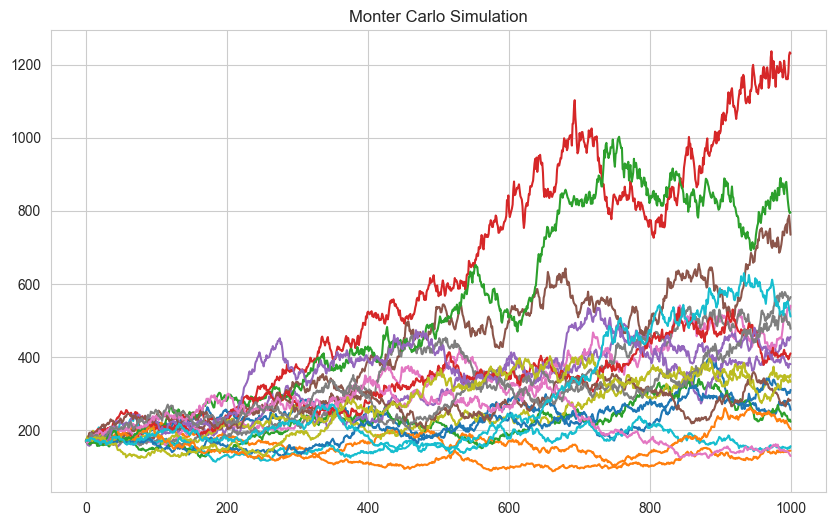

In [66]:
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.title("Monter Carlo Simulation")

From the line plots above, we can see the simulated stock prices can spread from about $200 to $1200. This has given us an idea about the potential price range for the stock based on the same level of volatility. We will do further analysis on our simulated stock prices to gain more insights.

lets calculate the Mean of the simulated last prices, Quantile (5%) and Quantile (95%) of the simulated last prices.

In [67]:
print("Expected price:", round(np.mean(price_list),2))

print("Quantile 5%:", np.percentile(price_list,5))

print("Quantile 95%:", np.percentile(price_list,95))

Expected price: 299.03
Quantile 5%: 134.68289081682676
Quantile 95%: 605.9911878211043


From the result above, we can see there is a 5% of probability that the stock price will be below $134.68 and a 5% of probability the price will be above $605.99. Our expected stock price at the year-end is $299.63.

In this article we understood the concept of Monte Carlo Simulation, Principle behind monte carlo simulation with two simple examples and predicted the stock prices with monte carlo simulation.